<h1><center><u>Finding Oil</u></center></h1>

Appendix:<a id='Appendix'></a>
<ul>
    <li><a href='#Summary'>Summary</a></li><br/>
    <li><a href='#Imports'>Imports</a></li><br/>
    <li><a href='#Setting_Up_Neural_Networks_to_use_Pytorch_Tensors'>Setting Up Neural Networks to use Pytorch Tensors</a>
      <ul>
          <li><a href='#Neural_Network'>Neural Network</a></li>
          <li><a href='#Scaled_Conjugate_Gradient'>Scaled Conjugate Gradient</a></li>
          <li><a href='#Partitioning'>Partitioning</a></li>
          <li><a href='#Train_Neural_Networks'>Train Neural Networks</a></li>
          <li><a href='#Summarize_Neural_Networks'>Summarize Neural Networks</a></li>
          <li><a href='#Choose_Best_Neural_Network'>Choose Best Neural Network</a></li>
      </ul>
    </li><br/>
    <li><a href='#Importing_and_Cleaning_Data'>Importing and Cleaning Data</a>
        <ul>
            <li><a href='#Importing_and_Cleaning_Oil_Prices'>Importing and Cleaning Oil Prices</a></li>
            <li><a href='#Importing_and_Cleaning_Oil_Company_Stock_Prices'>Importing and Cleaning Oil Company Stock Prices</a></li>
        </ul>
    </li><br/>
    <li><a href='#Finding_the_Best_Neural_Network_for_All_of_the_Data'>Finding the Best Neural Network for All of the Data</a>
        <ul>
            <li><a href='#Error_Plot_for_All_of_the_Data'>Error Plot for All of the Data</a></li>
            <li><a href='#Finding_the_Best_Network_for_All_of_the_Data_with_a_0.8/0.2_Split'>Finding the Best Network for All of the Data with a 0.8/0.2 Split</a></li>
            <li><a href='#Finding_the_Best_Network_for_All_of_the_Data_with_an_All-1_Split'>Finding the Best Network for All of the Data with an All-1 Split</a></li>
        </ul>
    </li><br/>
    <li><a href='#Fine-Tuning_Data'>Fine-Tuning Data</a>
         <ul>
             <li><a href='#What_is_the_Best_Range_of_Dates_to_Include_in_the_Data'>What is the Best Range of Dates to Include in the Data?</a></li>
             <li><a href='#What_is_the_Best_Range_of_Data_to_Include_for_the_Last_3_to_10_Days'>What is the Best Range of Data to Include for the Last 3 to 10 Days?</a></li>
             <li><a href='#What_is_the_Best_Neural_Network_for_the_Last_3_Days_of_Data'>What is the Best Neural Network for the Last 3 Days of Data?</a></li>
             <li><a href='#Can_You_Accuratly_Predict_the_Price_of_Oil_with_the_Last_3_Days_of_Data'>Can You Accuratly Predict the Price of Oil with the Last 3 Days of Data?</a></li>
             <li><a href='#Can_You_Accuratly_Predict_the_Price_of_Oil_with_the_Last_3_Days_of_Data_for_Any_Day'>Can You Accuratly Predict the Price of Oil with the Last 3 Days of Data for Any Day?</a></li>
             <li><a href='#Is_There_a_Single_Company_We_Can_Remove_that_Will_Improve_Our_Predictions'>Is There a Single Company We Can Remove that Will Improve Our Predictions?</a></li>
             <li><a href='#After_Removing_Valero_Will_Removing_Another_Company_Improve_Our_Results'>After Removing Valero Will Removing Another Company Improve Our Results?</a></li>
             <li><a href='#After_Removing_Valero_and_Sinopec_Will_Removing_Another_Company_Improve_Our_Results'>After Removing Valero and Sinopec Will Removing Another Company Improve Our Results?</a></li>
             <li><a href='#After_Removing_Valero_Sinopec_and_Total_SA_Will_Removing_Another_Company_Improve_Our_Results'>After Removing Valero, Sinopec, and Total SA Will Removing Another Company Improve Our Results?</a></li>
        </ul>
    </li><br/>
    <li><a href='#Does_It_Work'>Does It Work?</a>
        <ul>
          <li><a href='#Running_the_Optimized_Algorithm_on_Each_Day_of_the_Data'>Running the Optimized Algorithm on Each Day of the Data</a></li>
        </ul>
    </li><br/>

<a id='Summary'></a><h3>Summary</h3><a href='#Appendix'>&uparrow; Appendix</a>

<h4>Introduction</h4>

The goal of this project was to see if I could accurately predict the price of oil using the stock prices of ten of the largest oil companies in the world. I used the last five years of crude oil prices from West Texas Intermediate as the price of oil. The ten oil companies were BP, Chevron, Eni, Lukoil, Gazprom, Royal Dutch Shell, Sinopec, Total SA, Valero, and Exxon Mobil. I used Yahoo Finance to get the last five years of stock prices for each of these companies. By training neural networks with different partitions of the data, hidden layers, and training iterations I was able to get an accurate prediction of the price of oil. 

*When I use the term “partition method” I mean the partitioning of testing and training data. When I use the term “data partition” or “partition of data” I mean using a subset of the data.

A major part of this project was implementing a Pytorch neural network and learning how Pytorch works. By implementing a Pytorch neural network I was also able to learn more about the underlying methods and structure of neural networks and scaled conjugate gradient. After converting the neural network’s Numpy arrays to Pytorch tensors the speed of the processing time increased noticeably and the neural network was now able to utilize the GPU in machines that have one. Another major part of this project was researching why overfitting was such a big issue with this data set. Financial time series data sets like the price of oil, often suffer from overfitting and I wanted know why. So I looked into why overfitting occurs and ways to deal with it. Finally I looked into other ways to potentially improve the neural network’s accuracy.


<h4>Methods</h4>

My project used a lot of the methods we used in Assignment 5: Neural Networks and built on top of them. The first step of the project was to import and clean the data. I used Pandas, Numpy, and Pytorch to clean the data and get it into a usable tensor form. I replaced missing values (there was only one) with the average of the values before and after it. The oil price data shape was 1,260 by 1 and the oil company stock price data shape was 1,260 by 10. 1,260 is the number of business days that stocks and oil prices were recorded from 11/5/2013 to 11/5/2018.

The next step was to set up Pytorch neural networks that could handle large amounts of data quickly. I based the neural network code on the nn2 package from Assignment 5 (http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar). I changed all the Numpy arrays to Pytorch tensors and all the Numpy methods (e.g. Numpy.zeros, Numpy.dot) to Pytorch methods or custom methods that utilized Pytorch methods. The two main classes I used were the neural network and scaled conjugate gradient classes. When rewriting these classes I tested each method (e.g. use, _backward_pass, _unpack) individually to make sure the output matched the original code’s output. I only used the regression methods and excluded the classification methods from the code. I also used the partition method from the nn2 package in the beginning of the project, but later on switched to my own partition method which I used for the majority of the project. The partition method I used later on, split all the data by the very last entry. My main reference for learning Pytorch was the documentation page on the Pytorch website, with a lot of help from Stackoverflow. 

The third step was finding the optimal data partitioning and neural network. This was by far the largest step and required a lot of data partitioning and neural networks. After each partitioning of data, I ran the best neural network method from Assignment 5 to find the best hidden layer structure. The best hidden layer structure for all of the data and a 0.8/0.2 split was [20, 20, 20, 20, 20, 20, 20], then for all of the data with an all-1/1 split was [10, 10, 10, 10, 10, 10, 10, 10, 10], and for the last three days of data with an all-1/1 split was [4, 4, 4, 4, 4]. When training the neural networks I found 5,000 iterations was the optimal number of iterations. Unlike Assignment 5 I didn’t shuffle the data when I used the partition method, because the order of time series data is essential to predicting the future values. When I did shuffle the data the neural network’s predictions were way off. I partitioned the data in two different ways. The first was by taking different sized subsets from the five years of historical data on oil company stock prices and oil prices. The second was by removing an entire oil company from the oil company stock price data set. I tried different combinations of these two kinds of partitioning and found that a lot of the results varied too much to interpret. These discrepancies in the results came from the inconsistent nature of training multiple neural networks with the same data. In order to get consistent results I ran the neural networks several times (usually twenty-five or ten times) and averaged the output. The way I computed the accuracy of the neural network’s prediction was by subtracting the prediction by the test data and then taking its absolute value. I also printed out if the neural network successfully predicted if the price of oil would rise or fall compared to the last day of training data. I would call a prediction accurate if it was within $1.00. The fourth step of the project was testing the optimized data and neural network. The final step of the project was researching overfitting.


<h4>Results</h4>

The main result was that using the last three days of data with a hidden layer of [4, 4, 4, 4, 4] was the most accurate way to predict the future price of oil. When partitioning the data, the less historical data used the more accurate the neural network’s prediction was. When outputting the neural network’s prediction accuracy for each subset of the historical dataset, you could clearly see the smaller the subset the more accurate the prediction. Any data partition with more than nine days of historical data resulted in the neural network’s prediction accuracy being greater than \$1.00. However almost every data partition with less than nine days of data had a prediction accuracy less than \$1.00. When partitioning the last nine days of data, you could again see a clear correlation between the shortening of historical data and the improvement of the neural network’s prediction accuracy (i.e. nine days was the least accurate, eight days was the second least accurate). Using the last three days consistently gave predictions within \$0.20 for the last day of data. 

After finding the last three days to be the best partition of historic data, I wanted to see if this less data equals better accuracy correlation also applied to the number of oil companies. I did this by creating ten data subsets, each with one of the ten companies missing. Then I ran each subset on a neural network and compared their prediction accuracy to the prediction accuracy of a neural network with all ten oil companies in its dataset. I then repeated this process four times, each time removing the oil company that resulted in the most accurate prediction from all of the datasets. Although by removing the companies Valero and Sinopec I did get a slightly better prediction accuracy, it wasn’t as much of an improvement as shortening the historical data. Removing a third company (i.e. Total SA) resulted in the same prediction accuracy as removing just two. While removing a fourth company negatively affected the prediction accuracy. The main take away from this was that using less oil companies does not result in better prediction accuracy. 

Now that I found the optimal neural network and data partitioning for predicting the price of oil for the last day of the data, I wanted to see if this could be used for other days in the data set. The average prediction accuracy for the last day was \$0.12. I tried this neural network setup on every three, consecutive days of the 1,260 days of total data. The result was an average prediction accuracy of \$0.90. The most inaccurate prediction was around \$7.00 and the most accurate predictions were less than \$0.01.  Over the last five years the price of oil changes on average \$0.89 every day and ranges from \$107.95 to \$26.19. The neural network was not good at predicting whether the price would rise of fall (about 50/50). The time the neural network took to run one prediction was about fifteen seconds on my laptop, but was significantly quicker on a CSU CS department machine, and very quick on a machine with a GPU.


<h4>Conclusions</h4>

So can you accurately predict the price of oil with this data set? I would say yes, but there are some good days and some bad days. If you consider the complexity of predicting the price of oil (which is immense) and then the relatively simple data set we used, it’s not too shabby. It definitely shows the potential of using neural networks to predict pricing and market trends. This project was definitely a good way to better understand neural networks and really get my hands dirty with their inner workings and Pytorch. I really enjoyed using Pytorch and would definitely like to continue researching and using libraries like Pytorch and TensorFlow. Using tensors definitely sped up my neural networks training and it would be interesting to see how much faster it runs on a GPU. 

When I started this project I thought I would use the entire data set because neural networks weren’t susceptible to overfitting. But I quickly realized I was wrong and found that the neural networks worked much better when I only used a small part of the data to train. However limiting the dataset to the last three days seems to waste a lot of potential resources. One possible way of dealing with this overfitting limitation is regularization. Regularization basically limits the training of nodes in some way to prevent overfitting. Two popular kinds of regularization are L1 and L2 regularization which both modify the objective function of the neural network so that the nodes use smaller weights. L1 regularization penalizes the absolute value of the weight. While L2 regularization penalizes the squared value of the weight. L2 works better on data sets without a lot of outliers or noise and tends to drive all the weights down equally. While L1 is better suited to data sets with a lot of outliers and noise and allows some weights to be large while driving the rest down. By keeping the weights smaller L1 and L2 regularization makes the neural network’s nodes less sensitive to data and thus less likely to overfit. Another regularization method for dealing with overfitting is called dropout. When implemented dropout temporarily removes a set of nodes from the neural network each training iteration. This limits the amount of training each nodes gets which helps prevent overfitting. The last regularization method I found was called early stopping. Early stopping tests the neural network every iteration of training with validation data and stops the training when the neural network starts to perform worse on the validation data. This limits the training of all the nodes and makes sure the neural network has the optimal amount of training. Although I think that these regularization methods might help solve my overfitting issue, I don’t think they address the main issue with the data. The main issue being that over a long period of time the data follows a random walk like pattern. A random walk is the movement of data in no discernable pattern or trend and is very common in financial time series data. However there is a difference between data being a random walk and random walk like. Random walk data is completely random and very difficult to analyze and use. While random walk like data has random long term trends, but non-random short term trends, which can be analyzed and used to make short term predictions. If you look at the graph of the price of oil you can see this random walk like pattern in the long term trends (e.g. compare each year of the graph). However I don’t think the data is a random walk and is just random walk like since using the last few days of data was able to accurately predict the price of oil. One way of dealing with this long term, random walk like issue is by time differencing the data. Time differencing is a mathematical transformation of the data which takes the data and changes each value to the difference between each entry and its prior entry. This may help eliminate the long term randomness that many financial times series data suffer from. There are random walk models that are used for predicting financial time series. The basic idea behind these models is to use the most recent data (sound familiar?) combined with a random error term (a representation of the margin of error in a statistical model). 

If I were to do anything differently I would have looked into using other kinds of data besides oil company stock prices. Adding different kinds of data seems like the most straight forward way to improve the neural network’s prediction accuracy. Oil company stock prices only cover a part of all the information that decides oil prices and I think adding others parts would increase the neural network’s prediction accuracy. If I found a measure of political and market volatility in oil rich countries, I think that would cover a lot of areas of information that oil company stock prices don’t. Another interesting data source could be changes in taxes and policies on oil and carbon emissions. I would have also liked to try some of the anti-overfitting methods I found, but I’m not sure they would have worked as well as partitioning the data. Partitioning the data to only include the most recent entries was the best way I found to address the main issue with the data, which was that it was random walk like. If I was unable to partition the data and had to use all of the historical data, I would try using a combination of time differencing and regularization.


<h4>References</h4>

"A Combination of Artificial Neural Network and Random Walk Models for Financial Time Series Forecasting." n.d. Research Gate. https://www.researchgate.net/publication/235742777_A_Combination_of_Artificial_Neural_Network_and_Random_Walk_Models_for_Financial_Time_Series_Forecasting. 10 December 2018.

"A Gentle Introduction to the Random Walk for Times Series Forecasting with Python." n.d. Machine Learning Mastery. https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/. 10 December 2018.

"Biggest Oil Companies In The World." n.d. World Atlas. https://www.worldatlas.com/articles/biggest-oil-companies-in-the-world.html. 10 December 2018.

"Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma." n.d. Fred Economic Research. https://fred.stlouisfed.org/series/DCOILWTICO. 10 December 2018.

"Data Science 101: Preventing Overfitting in Neural Networks." n.d. KD Nuggets. https://www.kdnuggets.com/2015/04/preventing-overfitting-neural-networks.html/2. 10 December 2018.

"Error Term." n.d. Investopedia. https://www.investopedia.com/terms/e/errorterm.asp. 10 December 2018.

"How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls." n.d. Towards Data Science. https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424. 10 December 2018.

"List of largest oil and gas companies by revenue." n.d. Wikipedia. https://en.wikipedia.org/wiki/List_of_largest_oil_and_gas_companies_by_revenue. 10 December 2018.

"Overfitting." n.d. Wikipedia. https://en.wikipedia.org/wiki/Overfitting. 10 December 2018.

"Overfitting in Machine Learning: What It Is and How to Prevent It." n.d. Elite Data Science. https://elitedatascience.com/overfitting-in-machine-learning#examples. 10 December 2018.

"Preventing Deep Neural Network from Overfitting." n.d. Towards Data Science. https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a. 10 December 2018.

"Regularization in deep learning." n.d. Chatbots Life. https://chatbotslife.com/regularization-in-deep-learning-f649a45d6e0. 10 December 2018.

"Torch." n.d. Pytorch. https://pytorch.org/docs/stable/torch.html. 10 December 2018.



<a id='Imports'></a><h3>Imports</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [9]:
import numpy as np
import mlutils as ml
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time as time
import pandas as pd
import datetime as dt
from math import sqrt, ceil
import sys
import time
from copy import copy
import torch

#Checks if Cuda is availible and if so sets default tensor type to Cuda
if(torch.cuda.is_available()):
    torch.set_default_tensor_type('torch.cuda.DoubleTensor')
else:
    torch.set_default_tensor_type('torch.DoubleTensor')

#Sets precision of float in 
floatPrecision = sys.float_info.epsilon

<a id='Setting_Up_Neural_Networks_to_use_Pytorch_Tensors'></a><center><h2>Setting Up Neural Networks to use Pytorch Tensors</h2></center>

<a id='Neural_Network'></a><h3>Neural Network</h3><a href='#Appendix'>&uparrow; Appendix</a>

The following code was taken from the nn2.tar file given for Assignment 5: Neural Networks http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar

Description: The basic neural network setup we were given for Assignment 5. I only included the regression methods. Includes the methods init, train, use, and their various sub-methods. This code has been modified so all numpy arrays are now pytorch tensors and all numpy operations are now pytorch tensor operations. All classification methods have been removed.


Comments: I hadn't used python before this semester and replacing numpy with pytorch was much more difficult then I thought. I did learn a lot about the inner workings of neural networks and pytorch tensors from modifying the code.

In [10]:
class TorchNeuralNetwork:
    
    def __init__(self, ni,nhs,no):        
        if nhs == 0 or nhs == [0] or nhs is None or nhs == [None]:
            nhs = None
        else:
            try:
                nihs = [ni] + list(nhs)
            except:
                nihs = [ni] + [nhs]
                nhs = [nhs]
        if nhs is not None:
            self.Vs = [(torch.empty(1+nihs[i],nihs[i+1]).uniform_(-1, 1) / sqrt(nihs[i])) for i in range(len(nihs)-1)]
            self.W = torch.zeros(1+nhs[-1], no)
        else:
            self.Vs = None
            self.W = torch.zeros(1+ni,no)
        self.ni,self.nhs,self.no = ni,nhs,no
        self.Xmeans = None
        self.Xstds = None
        self.Tmeans = None
        self.Tstds = None
        self.trained = False
        self.reason = None
        self.errorTrace = None
        self.numberOfIterations = None
     
    def train(self,X,T,nIterations=100,verbose=False,
              weightPrecision=0,errorPrecision=0):
        
        if self.Xmeans is None:
            self.Xmeans = X.mean()
            self.Xstds = X.std() * sqrt((len(X) - 1)/(len(X)))
            self.Xconstant = self.Xstds.item() == 0
            self.XstdsFixed = copy(self.Xstds)
        X = self._standardizeX(X)

        if T.dim() == 1:
            T = T.view(-1, 1)

        if self.Tmeans is None:
            self.Tmeans = T.mean()
            self.Tstds = T.std() * sqrt((len(T) - 1)/(len(T)))
            self.Tconstant = self.Tstds.item() == 0
            self.TstdsFixed = copy(self.Tstds)
        T = self._standardizeT(T)

        # Local functions used by scg()

        def objectiveF(w):
            self._unpack(w)
            Y,_ = self._forward_pass(X)
            return 0.5 * torch.mean((Y - T)**2)

        def gradF(w):
            self._unpack(w)
            Y,Z = self._forward_pass(X)
            delta = (Y - T) / (X.shape[0] * T.shape[1])
            dVs,dW = self._backward_pass(delta,Z)
            return self._pack(dVs,dW)[0]
        
        scgresult = scg(self._pack(self.Vs,self.W), objectiveF, gradF,
                            xPrecision = weightPrecision,
                            fPrecision = errorPrecision,
                            nIterations = nIterations,
                            verbose=verbose,
                            ftracep=True)

        self._unpack(scgresult['x'])
        self.reason = scgresult['reason']
        self.errorTrace = torch.sqrt(scgresult['ftrace']) # * self.Tstds # to unstandardize the MSEs
        self.numberOfIterations = len(self.errorTrace)
        self.trained = True
        return self
    
    def use(self,X,allOutputs=False):
        Xst = self._standardizeX(X)
        Y,Z = self._forward_pass(Xst)
        Y = self._unstandardizeT(Y)
        if Z is None:
            return (Y,None) if allOutputs else Y
        else:
            return (Y,Z[1:]) if allOutputs else Y

    def getNumberOfIterations(self):
        return self.numberOfIterations
    
    def getErrorTrace(self):
        return self.errorTrace

    def _standardizeX(self,X):
        result = (X - self.Xmeans) / self.XstdsFixed
        # result[:,self.Xconstant] = 0.0
        return result
    
    def _unstandardizeX(self,Xs):
        return self.Xstds * Xs + self.Xmeans
   
    def _standardizeT(self,T):
        result = (T - self.Tmeans) / self.TstdsFixed
        # result[:,self.Tconstant] = 0.0
        return result
     
    def _unstandardizeT(self,Ts):
        return self.Tstds * Ts + self.Tmeans    
        
    def _forward_pass(self, X):
        if self.nhs is None:
            # no hidden units, just linear output layer
            Y = dot(X,  self.W[1:,:]) + self.W[0:1,:]
            Zs = [X]
        else:
            Zprev = X
            Zs = [Zprev]
            for i in range(len(self.nhs)):
                V = self.Vs[i]
                m = torch.nn.Tanh()
                Zprev = (m(dot(Zprev, V[1:,:])) + V[0:1])
                Zs.append(Zprev)
            Y = dot(Zprev, self.W[1:,:]) + self.W[0:1,:]
        return Y, Zs
    
    def _backward_pass(self, delta, Z):
        if self.nhs is None:
            # no hidden units, just linear output layer
            dW = torch.cat((dot(torch.ones(1,delta.shape[0]), delta),  dot(tran(Z[0]), delta)), 0)
            dVs = None
        else:
            dW = torch.cat((dot(torch.ones(1,delta.shape[0]), delta),  dot(tran(Z[-1]), delta)), 0)
            dVs = []
            delta = (1-Z[-1]**2) * dot( delta, tran(self.W[1:,:]))
            for Zi in range(len(self.nhs),0,-1):
                Vi = Zi - 1 # because X is first element of Z
                dV = torch.cat((dot(torch.ones(1,delta.shape[0]), delta), dot( tran(Z[Zi-1]), delta)), 0)
                dVs.insert(0,dV)
                delta = dot(delta, tran(self.Vs[Vi][1:,:])) * (1-Z[Zi-1]**2)
        return dVs,dW
    
    def _pack(self,Vs,W):
        if Vs is None:
            return W.view(-1)
        else:
            Vx = torch.zeros(0, 0)
            for V in Vs:
                Vx = torch.cat((Vx, V.view(-1).unsqueeze(0)), 1)
            return torch.cat((Vx.view(-1).unsqueeze(0), W.view(-1).unsqueeze(0)), 1)
    
    def _unpack(self, w):
        if self.nhs is None:
            self.W[:] = w.view(self.ni+1, self.no)
        else:
            first = 0
            numInThisLayer = self.ni
            for i in range(len(self.Vs)):
                self.Vs[i][:] = (w[0][first:first+(numInThisLayer+1)*self.nhs[i]]).view(numInThisLayer+1,self.nhs[i])
                first += (numInThisLayer+1) * self.nhs[i]
                numInThisLayer = self.nhs[i]
            self.W[:] = w[0][first:].view(numInThisLayer+1,self.no)
            
    def __repr__(self):
        str = 'NeuralNetwork({}, {}, {})'.format(self.ni,self.nhs,self.no)
        # str += '  Standardization parameters' + (' not' if self.Xmeans == None else '') + ' calculated.'
        if self.trained:
            str += '\n   Network was trained for {} iterations. Final error is {}.'.format(self.numberOfIterations,
                                                                                           self.errorTrace[-1])
        else:
            str += '  Network is not trained.'
        return str

#tran is the pytorch tensor equivalent of .T in numpy
def tran(ZT):
    if(ZT.dim() < 2): return ZT
    else: return ZT.t()

#dot is the pytorch tensor equivalent of numpy.dot(a, b)
def dot(a, b):
    if(a.dim() == 1 and b.dim() == 1): return torch.dot(a, b)
    if(a.dim() == 2 and b.dim() == 2): return (a @ b)
    if(a.dim() == 0 and b.dim() == 0): return (a*b)

<a id='Scaled_Conjugate_Gradient'></a><h3>Scaled Conjugate Gradient</h3><a href='#Appendix'>&uparrow; Appendix</a>

The following code was taken from the nn2.tar file given for Assignment 5: Neural Networks http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar

Description: This code has been modified so all numpy arrays are now pytorch tensors and all numpy operations are now pytorch tensor operations. All classification methods have been removed.

In [11]:
def scg(x, f, gradf, *fargs, **params):

    evalFunc = params.pop("evalFunc",lambda x: x)
    nIterations = params.pop("nIterations",1000)
    xPrecision = params.pop("xPrecision",0) 
    fPrecision = params.pop("fPrecision",0)
    xtracep = params.pop("xtracep",False)
    ftracep = params.pop("ftracep",False)
    verbose = params.pop("verbose",False)
    iterationVariable = params.pop("iterationVariable",None)

    nvars = len(x)
    sigma0 = 1.0e-6
    fold = f(x, *fargs)
    fnow = fold
    gradnew = gradf(x, *fargs)
    gradold = copy(gradnew)
    d = -gradnew				# Initial search direction.
    success = True				# Force calculation of directional derivs.
    nsuccess = 0				# nsuccess counts number of successes.
    beta = 1.0e-6				# Initial scale parameter. Lambda in Moeller.
    betamin = 1.0e-15 			# Lower bound on scale.
    betamax = 1.0e20			# Upper bound on scale.
    j = 1				# j counts number of iterations.
    
    if xtracep:
        xtrace = torch.zeros((nIterations+1,len(x)))
        xtrace[0,:] = x
    else:
        xtrace = None

    if ftracep:
        ftrace = torch.zeros(nIterations+1)
        ftrace[0] = fold
    else:
        ftrace = None
        
    ### Main optimization loop.
    while j <= nIterations:
        if verbose:
            startTime = time.time()

        # Calculate first and second directional derivatives.
        if success:
            mu = dot(d, gradnew)
            if torch.isnan(mu): print("mu is NaN")
            if mu >= 0:
                d = -gradnew
                mu = dot(d, gradnew)
            kappa = dot(d, d)
            if True and kappa < floatPrecision:
                # print( kappa)
                return {'x':x, 'f':fnow, 'nIterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 
                        'ftrace':ftrace[:j] if ftracep else None,
                        'reason':"limit on machine precision"}
            sigma = sigma0/sqrt(kappa)
            xplus = x + sigma * d
            gplus = gradf(xplus, *fargs)
            theta = dot(d, (gplus - gradnew))/sigma

        ## Increase effective curvature and evaluate step size alpha.
        delta = theta + beta * kappa
        if torch.isnan(delta): print("delta is NaN")
        if delta <= 0:
            delta = beta * kappa
            beta = beta - theta/kappa
        if delta == 0:
            success = False
            fnow = fold
        else:
            alpha = -mu/delta

            ## Calculate the comparison ratio.
            xnew = x + alpha * d
            fnew = f(xnew, *fargs)
            Delta = 2 * (fnew - fold) / (alpha*mu)
            # if np.isnan(Delta):
            #     pdb.set_trace()
            if not torch.isnan(Delta) and Delta  >= 0:
                success = True
                nsuccess += 1
                x = xnew
                fnow = fnew
            else:
                success = False
                fnow = fold

        if verbose and j % max(1, ceil(nIterations/10)) == 0:
            print("SCG: Iteration {:d} ObjectiveF={:.5f} Scale={:.3e} Time={:.5f} s/iter".format(j, evalFunc(fnow), beta, (time.time()-startTime)/10.0))
            
        if xtracep:
            xtrace[j,:] = x
        if ftracep:
            ftrace[j] = evalFunc(fnow)
            
        if success:
            ## Test for termination

            if max(abs(alpha*d)) < xPrecision:
                return {'x':x, 'f':fnow, 'nIterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 
                        'ftrace':ftrace[:j] if ftracep else None,
                        'reason':"limit on x Precision"}
            elif abs(fnew-fold) < fPrecision:
                return {'x':x, 'f':fnow, 'nIterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 
                        'ftrace':ftrace[:j] if ftracep else None,
                        'reason':"limit on f Precision"}
            else:
                ## Update variables for new position
                fold = fnew
                gradold = gradnew
                gradnew = gradf(x, *fargs)
                ## If the gradient is zero then we are done.
                if np.dot(gradnew, gradnew) == 0:
                    return {'x':x, 'f':fnow, 'nIterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 'ftrace':ftrace[:j],
                            'reason':"zero gradient"}

        ## Adjust beta according to comparison ratio.
        if torch.isnan(Delta) or Delta < 0.25:
            beta = min(4.0*beta, betamax)
        elif Delta > 0.75:
            beta = max(0.5*beta, betamin)

        ## Update search direction using Polak-Ribiere formula, or re-start 
        ## in direction of negative gradient after nparams steps.
        if nsuccess == nvars:
            d = -gradnew
            nsuccess = 0
        elif success:
            gamma = dot((gradold - gradnew), (gradnew/mu))
            d = gamma * d - gradnew
        j += 1

        # if iterationVariable is not None:
        #     iterationVariable.value = j

        ## If we get here, then we haven't terminated in the given number of 
        ## iterations.

    return {'x':x, 'f':fnow, 'nIterations':j, 'xtrace':xtrace[:j,:] if xtracep else None, 'ftrace':ftrace[:j],
            'reason':"did not converge"}

<a id='Partitioning'></a><h3>Partitioning</h3><a href='#Appendix'>&uparrow; Appendix</a>

The following code was taken from the nn2.tar file given for Assignment 5: Neural Networks http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar

Description: Same as the partition method from the mlutils.py file except there's no shuffling. Worked as is for pytorch tensors. I removed the line of code that rearranges columns randomly because the data is a time series and rearranging them negatively impacted results. All classification methods have been removed.

Comments: Partitioning the data was a big part of the project and this method was the starting point that I built on when optimizing the neural networks input data.

In [12]:
def partition(X,T,D,fractions):
   
    trainFraction = fractions[0]
    if len(fractions) == 2:
        # Skip the validation step
        validateFraction = 0
        testFraction = fractions[1]
    else:
        validateFraction = fractions[1]
        testFraction = fractions[2]
        
    rowIndices = np.arange(X.shape[0])
    
    # regression, so do not partition according to targets.
    n = X.shape[0]
    nTrain = round(trainFraction * n)
    nValidate = round(validateFraction * n)
    nTest = round(testFraction * n)
    if nTrain + nValidate + nTest > n:
        nTest = n - nTrain - nValidate
    Xtrain = X[rowIndices[:nTrain],:]
    Ttrain = T[rowIndices[:nTrain],:]
    Dtrain = D[rowIndices[:nTrain],:]
    if nValidate > 0:
        Xvalidate = X[rowIndices[nTrain:nTrain+nValidate],:]
        Tvalidate = T[rowIndices[nTrain:nTrain:nValidate],:]
    Xtest = X[rowIndices[nTrain+nValidate:nTrain+nValidate+nTest],:]
    Ttest = T[rowIndices[nTrain+nValidate:nTrain+nValidate+nTest],:]
    Dtest = D[rowIndices[nTrain+nValidate:nTrain+nValidate+nTest],:]

    if nValidate > 0:
        return Xtrain,Ttrain,Xvalidate,Tvalidate,Xtest,Ttest
    else:
        return Xtrain,Ttrain,Dtrain,Xtest,Ttest,Dtest

Description: Partitions the data so the training data is everything but the last entry and the test data is the last entry.

In [13]:
def partitionOne(X,T,D):
    Xtrain = X[:-1,:]
    Ttrain = T[:-1,:]
    Dtrain = D[:-1,:]
    Xtest = X[-1,:].unsqueeze(0)
    Ttest = T[-1,:].unsqueeze(0)
    Dtest = D[-1,:].reshape(-1, 1)
    return Xtrain,Ttrain,Dtrain,Xtest,Ttest,Dtest

<a id='Train_Neural_Networks'></a><h3>Train Neural Networks</h3><a href='#Appendix'>&uparrow; Appendix</a>

Description: Inputs X, T, and hidden layer structuress and outputs each hidden layer structures training and testing data performance.

In [14]:
def trainNNs(X, T, D, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False, verbose=False):
    results = []
    for network in hiddenLayerStructures:
        test = []
        train = []
        startTime = time.time()
        for n in range(numberRepetitions):
            if(trainFraction == 1):
                Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(X, T, D)
            else:
                Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partition(X, T, D, (trainFraction, 1-trainFraction))

            nnet = TorchNeuralNetwork(X.shape[1], network, T.shape[1])

            nnet.train(Xtrain, Ttrain, nIterations=numberIterations, verbose=verbose)
            YTrain = nnet.use(Xtrain)
            Ytest = nnet.use(Xtest)           
            train.append(torch.sqrt(torch.mean((YTrain-Ttrain)**2)))
            test.append(torch.sqrt(torch.mean((Ytest-Ttest)**2)))
                
        results.append([network, train, test, time.time() - startTime])

    return results

<a id='Summarize_Neural_Networks'></a><h3>Summarize Neural Networks</h3><a href='#Appendix'>&uparrow; Appendix</a>

Description: Takes the output of trainNNs and summarizes the data performance for each hidden layer.

In [15]:
def summarize(results):
    rst = []
    for network in results:
        subrst = []
        for i, v in enumerate(network):
            if (i == 0): subrst.append(v)
            elif (i == len(network)-1): subrst.append(v)
            else: subrst.append(np.average(v))
        rst.append(subrst)
    return rst

<a id='Choose_Best_Neural_Network'></a><h3>Choose Best Neural Network</h3><a href='#Appendix'>&uparrow; Appendix</a>

Description: Takes the output of summarize and chooses the hidden layer with the best performance.

In [16]:
def bestNetwork(summary):
    i, min = 0, summary[0][2]
    for ind, network in enumerate(summary):
        if(network[2] < min):
            i, min = ind, network[2]
    return summary[i]

<a id='Importing_and_Cleaning_Data'></a><center><h2>Importing and Cleaning Data</h2></center>

<a id='Importing_and_Cleaning_Oil_Prices'></a><h3>Importing and Cleaning Oil Prices</h3><a href='#Appendix'>&uparrow; Appendix</a>

Description: The main dataset of oil prices I was trying to predict. The value of T.

Comments: It was a difficult dataset to use because it resembles a random walk. 

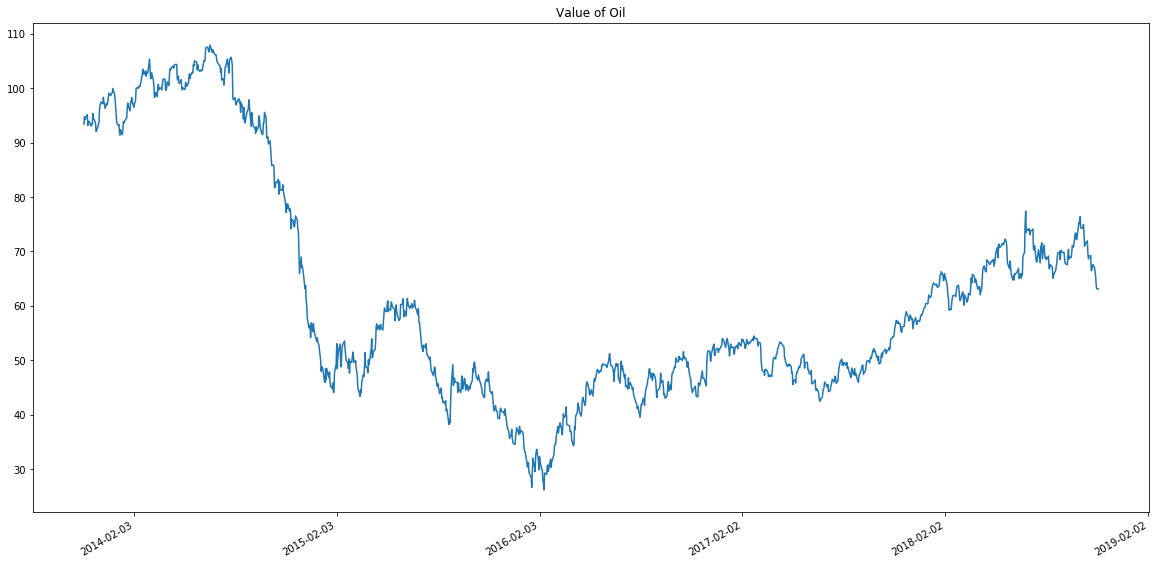

In [17]:
#2017-07-03,45.57 is missing and averaged between 2017-06-30,46.02 and 2017-07-05,45.11
data = pd.read_csv("oil_price_11.05.18-11.05.13.csv")
T = data.loc[0:1259, 'DCOILWTICO':'DCOILWTICO'].values
dates = pd.read_csv("oil_price_11.05.18-11.05.13.csv")
dates = dates.loc[0:1259, 'DATE':'DATE'].values
D = [dt.datetime.strptime(d[0], '%Y-%m-%d').date() for d in dates]
D = np.array(D).reshape(1260, 1)
plt.figure(figsize=(20,10))
plt.title("Value of Oil")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 365))
plt.plot(D, T)
plt.gcf().autofmt_xdate()
plt.show()
if(torch.cuda.is_available()):
    Tt = torch.from_numpy(T).cuda()
else:
    Tt = torch.from_numpy(T)

<a id='Importing_and_Cleaning_Oil_Company_Stock_Prices'></a><h3>Importing and Cleaning Oil Company Stock Prices</h3><a href='#Appendix'>&uparrow; Appendix</a>

Description: The main dataset of oil company stock prices I was using to predict the value of oil. The value of X.

Comments: It was interesting dataset and it looks like there is some correlation between each company and the price of oil.

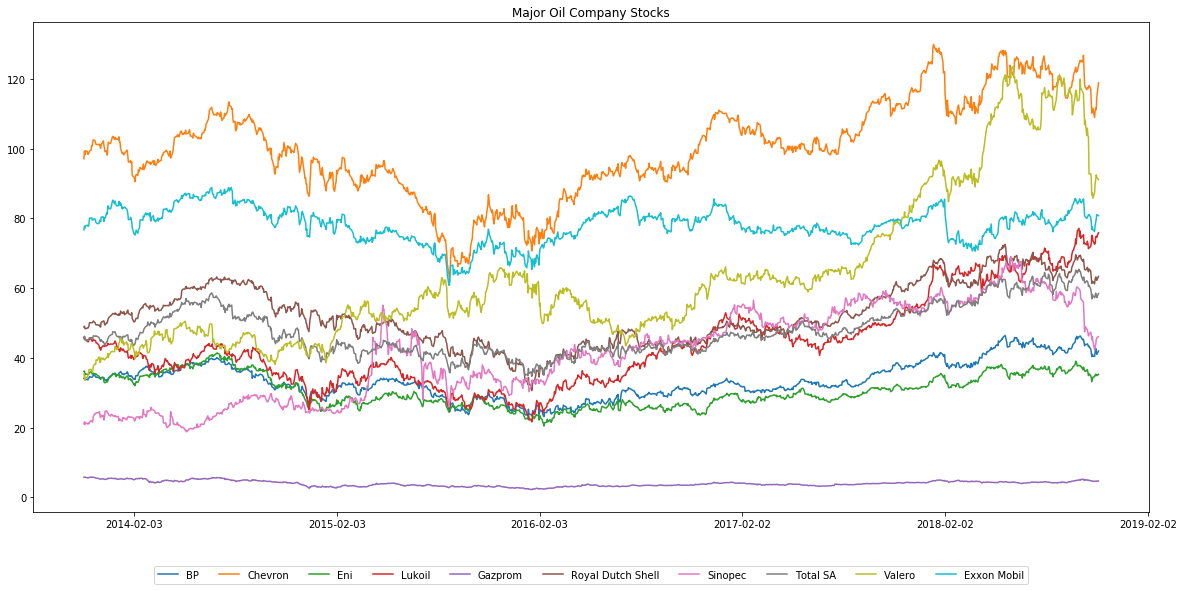

In [18]:
fileList = ["E_11.05.18-11.05.13.csv","LUKOY_11.05.18-11.05.13.csv","OGZPY_11.05.18-11.05.13.csv","RDS_11.05.18-11.05.13.csv","SHI_11.05.18-11.05.13.csv","TOT_11.05.18-11.05.13.csv","VLO_11.05.18-11.05.13.csv","XOM_11.05.18-11.05.13.csv"]
oil_company_names=["BP", "Chevron", "Eni", "Lukoil", "Gazprom", "Royal Dutch Shell", "Sinopec", "Total SA", "Valero", "Exxon Mobil"]
X = np.concatenate(([pd.read_csv("BP_11.05.18-11.05.13.csv").loc[0:1259, 'Adj Close':'Adj Close'].values.reshape(1260,)], [pd.read_csv("CVX_11.05.18-11.05.13.csv").loc[0:1259, 'Adj Close':'Adj Close'].values.reshape(1260,)]), axis=0)
for file in fileList:
    X = np.concatenate((X, [pd.read_csv(file).loc[0:1259, 'Adj Close':'Adj Close'].values.reshape(1260,)]), axis=0)
X = X.transpose()
plt.figure(figsize=(20,10))
plt.title("Major Oil Company Stocks")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 365))
plt.gcf().autofmt_xdate()
    
for i, x in enumerate(X.transpose()):
    plt.plot(D, x, label=oil_company_names[i])
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=10)
plt.show()
if(torch.cuda.is_available()):
    Xt = torch.from_numpy(X).cuda()
else:
    Xt = torch.from_numpy(X)

<a id='Finding_the_Best_Neural_Network_for_All_of_the_Data'></a><center><h2>Finding the Best Neural Network for All of the Data</h2></center>

<a id='Error_Plot_for_All_of_the_Data'></a><h3>Error Plot for All of the Data</h3><a href='#Appendix'>&uparrow; Appendix</a>

Finding the optimal amount of iterations for training.

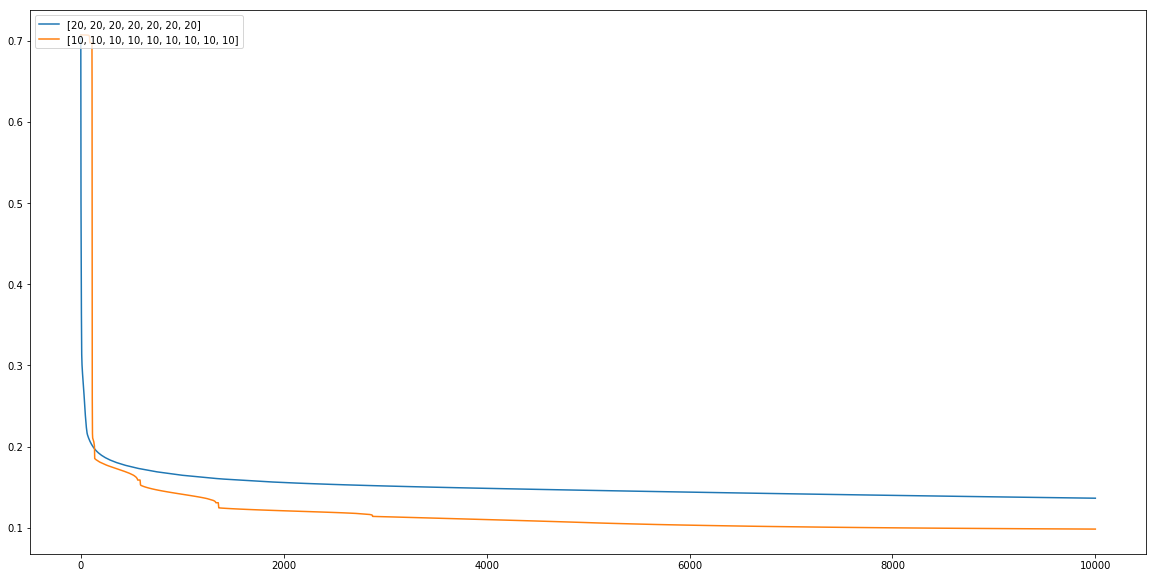

In [16]:
plt.figure(figsize=(20,10))
hiddenLayers = [[20, 20, 20, 20, 20, 20, 20], [10, 10, 10, 10, 10, 10, 10, 10, 10]]
for network in hiddenLayers:
    nnet3 = TorchNeuralNetwork(X.shape[1], network, T.shape[1])
    nnet3.train(Xt, Tt,  nIterations=10000)
    plt.plot(nnet3.getErrorTrace().numpy(), '-')
plt.legend((hiddenLayers), loc='upper left')
plt.show()

<a id='Finding_the_Best_Network_for_All_of_the_Data_with_a_0.8/0.2_Split'></a><h3>Finding the Best Network for All of the Data with a 0.8/0.2 Split</h3><a href='#Appendix'>&uparrow; Appendix</a>

The best hidden layer structure is [20, 20, 20, 20, 20, 20, 20] for all the data with a 0.8/0.2 training/testing split.

In [47]:
hiddenLayers = [[20, 20, 20, 20, 20, 20, 20], [21, 21, 21, 21, 21, 21, 21]]
print(hiddenLayers)
results = trainNNs(Xt, Tt, D, .8, hiddenLayers, 3, 5000)
print(bestNetwork(summarize(results)))

[[10, 10, 10, 10, 10, 10, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10]]
[[10, 10, 10, 10, 10, 10, 10, 10, 10], 3.3205389547338373, 6.0729768569522635, 117.21194052696228]


[10, 10, 10, 10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10] @ 2000 <br/>
[10, 10, 10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] @ 2000 <br/>
[10, 10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10, 10, 10, 10] @ 2000 <br/>
[10, 10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10, 10, 10, 10] @ 3000 <br/>
[10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10, 10, 10] @ 2000 <br/>
[10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10] @ 2000 <br/>
[15, 15, 15, 15, 15, 15, 15] beats [10, 10, 10, 10, 10, 10, 10] @ 2000 <br/>
[15, 15, 15, 15, 15, 15, 15] beats [25, 25, 25, 25, 25, 25, 25] @ 5000 <br/>
[20, 20, 20, 20, 20, 20, 20] beats [15, 15, 15, 15, 15, 15, 15] @ 5000 <br/>
[20, 20, 20, 20, 20, 20, 20] beats [25, 25, 25, 25, 25, 25, 25] @ 5000 <br/>
[20, 20, 20, 20, 20, 20, 20] beats [23, 23, 23, 23, 23, 23, 23] @ 5000 <br/>
[20, 20, 20, 20, 20, 20, 20] beats [21, 21, 21, 21, 21, 21, 21] @ 5000 <br/>
[20, 20, 20, 20, 20, 20, 20] is best hidden layer for .8 fraction

<a id='Finding_the_Best_Network_for_All_of_the_Data_with_an_All-1_Split'></a><h3>Finding the Best Network for All of the Data with an All-1 Split</h3><a href='#Appendix'>&uparrow; Appendix</a>

The best hidden layer structure is [10, 10, 10, 10, 10, 10, 10, 10, 10] for all the data with a All-1/1 training/testing split.

In [ ]:
hiddenLayers = [[10, 10, 10, 10, 10, 10, 10, 10, 10],[10, 10, 10, 10, 10, 10, 10, 10]]
print(hiddenLayers)
results = trainNNs(Xt, Tt, D, .8, hiddenLayers, 3, 5000)
print(bestNetwork(summarize(results)))

[19, 19, 19, 19, 19, 19, 19] beats [20, 20, 20, 20, 20, 20, 20] @ 5000 w/ partitionOne<br/>
[17, 17, 17, 17, 17, 17, 17] beats [19, 19, 19, 19, 19, 19, 19] @ 5000 w/ partitionOne<br/>
[16, 16, 16, 16, 16, 16, 16] beats [17, 17, 17, 17, 17, 17, 17] @ 5000 w/ partitionOne<br/>
[15, 15, 15, 15, 15, 15, 15] beats [16, 16, 16, 16, 16, 16, 16] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10] beats [15, 15, 15, 15, 15, 15, 15] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10] beats [5, 5, 5, 5, 5, 5, 5] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10] beats [8, 8, 8, 8, 8, 8, 8] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10] beats [9, 9, 9, 9, 9, 9, 9] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10, 10] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10, 10, 10, 10, 10] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10, 10, 10] beats [10, 10, 10, 10, 10, 10, 10, 10] @ 5000 w/ partitionOne<br/>
[10, 10, 10, 10, 10, 10, 10, 10, 10] is best hidden layer for fraction with 1 element for test

<a id='Fine-Tuning_Data'></a><center><h2>Fine-Tuning Data</h2></center>

<a id='What_is_the_Best_Range_of_Dates_to_Include_in_the_Data'></a><h3>What is the Best Range of Dates to Include in the Data?</h3><a href='#Appendix'>&uparrow; Appendix</a>

The best range of data to use for predicting the price of oil when you partition the data by every ten days is the last ten days. If you look at the output the less historical data you include in the dataset the better the prediction.

In [ ]:
for r in range(0, Xt.shape[0]-2, 10):
    Xt2 = Xt[r:,:]
    Tt2 = Tt[r:,:]
    D2 = D[r:,:]
    Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt2, Tt2, D2)
    nnet1 = TorchNeuralNetwork(Xt2.shape[1], [10, 10, 10, 10, 10, 10, 10, 10, 10], Tt2.shape[1]) 
    nnet1.train(Xtrain, Ttrain, nIterations=5000)
    Ytest = nnet1.use(Xtest)
    print(r)
    print((((Ytest-Ttest)).sum()))

[10, 10, 10, 10, 10, 10, 10, 10, 10] at 700 iterations
0
tensor(16.2603)
10
tensor(10.6732)
20
tensor(11.8949)
30
tensor(15.4209)
40
tensor(5.6113)
50
tensor(13.3600)
60
tensor(12.2080)
70
tensor(10.3871)
80
tensor(9.7202)
90
tensor(9.2227)
100
tensor(8.5704)
110
tensor(8.3465)
120
tensor(7.7634)
130
tensor(7.6248)
140
tensor(6.6878)
150
tensor(8.8263)
160
tensor(8.7143)
170
tensor(5.4678)
180
tensor(7.4349)
190
tensor(8.5601)
200
tensor(12.6506)
210
tensor(6.5628)
220
tensor(9.0436)
230
tensor(9.6890)
240
tensor(9.4138)
250
tensor(8.9419)
260
tensor(4.0234)
270
tensor(7.5055)
280
tensor(5.3385)
290
tensor(7.3220)
300
tensor(7.6593)
310
tensor(8.4774)
320
tensor(7.6303)
330
tensor(6.1168)
340
tensor(8.5656)
350
tensor(7.2855)
360
tensor(8.2237)
370
tensor(8.0647)
380
tensor(8.9062)
390
tensor(9.6302)
400
tensor(8.6726)
410
tensor(7.5139)
420
tensor(8.1671)
430
tensor(7.4620)
440
tensor(7.7355)
450
tensor(7.7650)
460
tensor(8.3117)
470
tensor(8.2854)
480
tensor(7.2562)
490
tensor(7.9200)
500
tensor(6.8755)
510
tensor(5.7205)
520
tensor(3.9504)
530
tensor(7.1276)
540
tensor(4.5502)
550
tensor(7.3279)
560
tensor(7.7386)
570
tensor(7.8043)
580
tensor(8.3429)
590
tensor(8.5137)
600
tensor(7.9371)
610
tensor(7.6917)
620
tensor(6.2011)
630
tensor(7.9398)
640
tensor(6.7402)
650
tensor(7.4417)
660
tensor(0.1994)
670
tensor(6.5867)
680
tensor(7.2942)
690
tensor(7.6809)
700
tensor(1.1188)
710
tensor(6.2153)
720
tensor(7.4309)
730
tensor(7.7151)
740
tensor(7.3917)
750
tensor(7.4129)
760
tensor(6.6275)
770
tensor(7.1739)
780
tensor(7.2180)
790
tensor(6.3611)
800
tensor(6.8687)
810
tensor(6.9995)
820
tensor(7.0654)
830
tensor(5.6498)
840
tensor(6.5754)
850
tensor(6.4869)
860
tensor(6.6725)
870
tensor(6.6423)
880
tensor(6.6148)
890
tensor(5.9664)
900
tensor(6.0353)
910
tensor(5.9413)
920
tensor(6.0420)
930
tensor(5.5412)
940
tensor(5.3899)
950
tensor(5.5278)
960
tensor(5.5704)
970
tensor(5.6737)
980
tensor(6.5917)
990
tensor(6.5051)
1000
tensor(6.5874)
1010
tensor(5.7232)
1020
tensor(6.3460)
1030
tensor(6.3909)
1040
tensor(6.2881)
1050
tensor(5.9270)
1060
tensor(6.2657)
1070
tensor(7.5766)
1080
tensor(7.8630)
1090
tensor(7.2490)
1100
tensor(7.7179)
1110
tensor(7.7302)
1120
tensor(7.1429)
1130
tensor(6.4453)
1140
tensor(6.1650)
1150
tensor(7.4070)
1160
tensor(5.5762)
1170
tensor(5.2705)
1180
tensor(4.8287)
1190
tensor(4.7054)
1200
tensor(4.9140)
1210
tensor(5.6172)
1220
tensor(5.2042)
1230
tensor(4.4720)
1240
tensor(4.1549)
1250
tensor(0.7817)

<a id='What_is_the_Best_Range_of_Data_to_Include_for_the_Last_3_to_10_Days'></a><h3>What is the Best Range of Data to Include for the Last 3 to 10 Days?</h3><a href='#Appendix'>&uparrow; Appendix</a>

The best data to include on average is the last three days while the worst is the last ten days.

In [72]:
dif = [0 for comp in range(8)]
r1 = 0
for r in range(Xt.shape[0]-10, Xt.shape[0]-2, 1):
    for r2 in range(5):
        Xt2 = Xt[r:,:]
        Tt2 = Tt[r:,:]
        D2 = D[r:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt2, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt2.shape[1], [10, 10, 10, 10, 10, 10, 10, 10, 10], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print(r)
        print((((Ytest-Ttest)).sum()))
        dif[r1] = dif[r1] + ((torch.abs(Ytest-Ttest)).sum())
    r1 = r1 + 1
dif

1250
tensor(1.8514)
1250
tensor(1.4087)
1250
tensor(1.3650)
1250
tensor(1.6447)
1250
tensor(1.6406)
1251
tensor(0.8484)
1251
tensor(0.8776)
1251
tensor(0.7767)
1251
tensor(0.5557)
1251
tensor(0.4276)
1252
tensor(-0.0827)
1252
tensor(0.0907)
1252
tensor(1.4134)
1252
tensor(0.2129)
1252
tensor(1.0798)
1253
tensor(0.3650)
1253
tensor(0.1703)
1253
tensor(0.5070)
1253
tensor(0.6000)
1253
tensor(0.3137)
1254
tensor(-0.4161)
1254
tensor(-0.1516)
1254
tensor(-0.1722)
1254
tensor(-0.5373)
1254
tensor(-0.3890)
1255
tensor(-0.0907)
1255
tensor(-0.3520)
1255
tensor(-0.1713)
1255
tensor(-0.3983)
1255
tensor(-0.0381)
1256
tensor(0.7190)
1256
tensor(0.2692)
1256
tensor(-0.0978)
1256
tensor(0.3167)
1256
tensor(0.0495)
1257
tensor(-0.1945)
1257
tensor(-0.1738)
1257
tensor(-0.2119)
1257
tensor(-0.1972)
1257
tensor(-0.1915)


<a id='What_is_the_Best_Neural_Network_for_the_Last_3_Days_of_Data'></a><h3>What is the Best Neural Network for the Last 3 Days of Data?</h3><a href='#Appendix'>&uparrow; Appendix</a>

The number of iterations is usually around 5,000.

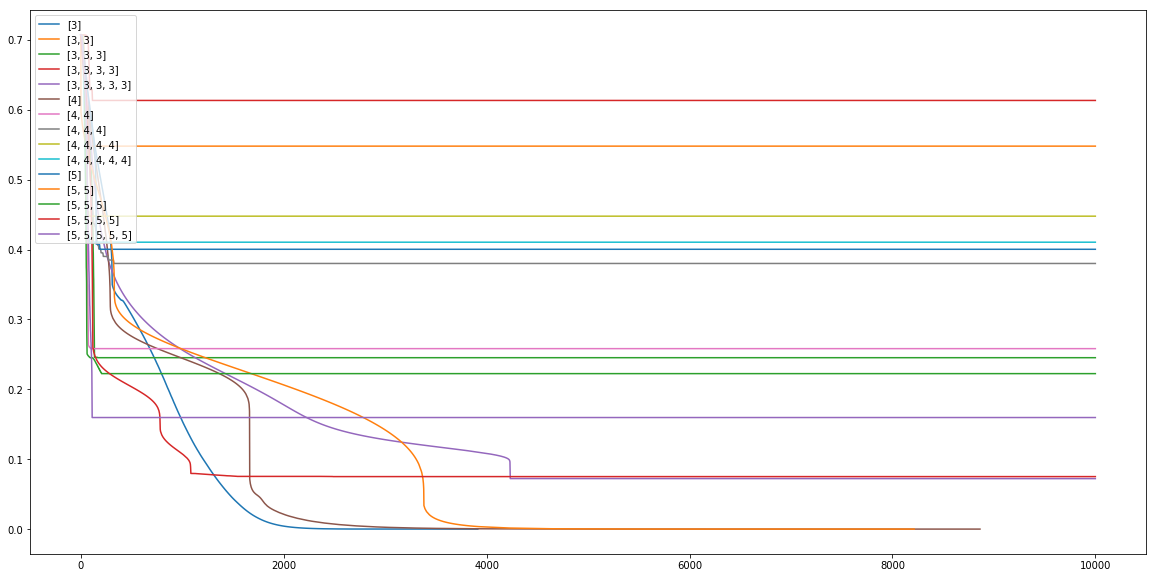

In [28]:
hiddenLayers=[[3], [3, 3], [3, 3, 3], [3, 3, 3, 3], [3, 3, 3, 3, 3], [4], [4, 4], [4, 4, 4], [4, 4, 4, 4], [4, 4, 4, 4, 4], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5]]
Xt2 = Xt[1257:,:]
Tt2 = Tt[1257:,:]
D2 = D[1257:,:]
plt.figure(figsize=(20,10))
for network in hiddenLayers:
    nnet3 = TorchNeuralNetwork(Xt2.shape[1], network, Tt2.shape[1])
    nnet3.train(Xt2, Tt2,  nIterations=10000)
    plt.plot(nnet3.getErrorTrace().numpy(), '-')
plt.legend((hiddenLayers), loc='upper left')
plt.show()

The best performing hidden layer is [4, 4, 4, 4, 4].

In [27]:
hiddenLayers=[[4, 4, 4, 4], [4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4]]
print(hiddenLayers)
results = trainNNs(Xt2, Tt2, D2, 1, hiddenLayers, 5, 5000)
print(bestNetwork(summarize(results)))

[[4, 4, 4, 4], [4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4]]
[[4, 4, 4, 4, 4], 0.11082602065133229, 0.10662432250723412, 156.46226739883423]


<a id='Can_You_Accuratly_Predict_the_Price_of_Oil_with_the_Last_3_Days_of_Data'></a><h3>Can You Accuratly Predict the Price of Oil with the Last 3 Days of Data?</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [29]:
sumOdata = 0

for r in range(10):
    Xt2 = Xt[1257:,:]
    Tt2 = Tt[1257:,:]
    D2 = D[1257:,:]
    Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt2, Tt2, D2)
    nnet1 = TorchNeuralNetwork(Xt2.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
    nnet1.train(Xtrain, Ttrain, nIterations=5000)
    Ytest = nnet1.use(Xtest)
    print(r)
    print(Ytest-Ttest)
    print((((Ytest-Ttest)).sum()))
    sumOdata = sumOdata + ((torch.abs(Ytest-Ttest)).sum())
sumOdata

0
tensor([[0.1096]])
tensor(0.1096)
1
tensor([[0.1184]])
tensor(0.1184)
2
tensor([[-0.0346]])
tensor(-0.0346)
3
tensor([[-0.1816]])
tensor(-0.1816)
4
tensor([[-0.1233]])
tensor(-0.1233)
5
tensor([[-0.0905]])
tensor(-0.0905)
6
tensor([[0.0996]])
tensor(0.0996)
7
tensor([[-0.2530]])
tensor(-0.2530)
8
tensor([[-0.1493]])
tensor(-0.1493)
9
tensor([[0.1004]])
tensor(0.1004)


tensor(1.2604)

Yes you can accurately predict the last day of data with the three days of data before it with an average accuracy of \$0.12.

<a id='Can_You_Accuratly_Predict_the_Price_of_Oil_with_the_Last_3_Days_of_Data_for_Any_Day'></a><h3>Can You Accuratly Predict the Price of Oil with the Last 3 Days of Data for Any Day?</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [30]:
sumOdatas = [0 for comp in range(1257)]
for r in range(1257):
    Xt2 = Xt[1257-r:1260-r,:]
    Tt2 = Tt[1257-r:1260-r:,:]
    D2 = D[1257-r:1260-r:,:]
    Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt2, Tt2, D2)
    nnet1 = TorchNeuralNetwork(Xt2.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
    nnet1.train(Xtrain, Ttrain, nIterations=5000)
    Ytest = nnet1.use(Xtest)
    print(r)
    print(Ytest-Ttest)
    print((((Ytest-Ttest)).sum()))
    sumOdatas[r] = (((Ytest-Ttest)).sum())


0
tensor([[0.0762]])
tensor(0.0762)
1
tensor([[0.7531]])
tensor(0.7531)
2
tensor([[1.9659]])
tensor(1.9659)
3
tensor([[0.6500]])
tensor(0.6500)
4
tensor([[1.0639]])
tensor(1.0639)
5
tensor([[0.4283]])
tensor(0.4283)
6
tensor([[-0.5899]])
tensor(-0.5899)
7
tensor([[-0.7184]])
tensor(-0.7184)
8
tensor([[-0.8529]])
tensor(-0.8529)
9
tensor([[2.8037]])
tensor(2.8037)
10
tensor([[-0.1051]])
tensor(-0.1051)
11
tensor([[-0.2091]])
tensor(-0.2091)
12
tensor([[0.5188]])
tensor(0.5188)
13
tensor([[2.2378]])
tensor(2.2378)
14
tensor([[-0.2907]])
tensor(-0.2907)
15
tensor([[-1.0170]])
tensor(-1.0170)
16
tensor([[-0.0999]])
tensor(-0.0999)
17
tensor([[2.7164]])
tensor(2.7164)
18
tensor([[1.2389]])
tensor(1.2389)
19
tensor([[-0.6844]])
tensor(-0.6844)
20
tensor([[0.0247]])
tensor(0.0247)
21
tensor([[0.9935]])
tensor(0.9935)
22
tensor([[1.0501]])
tensor(1.0501)
23
tensor([[-1.1547]])
tensor(-1.1547)
24
tensor([[-0.3859]])
tensor(-0.3859)
25
tensor([[-2.5388]])
tensor(-2.5388)
26
tensor([[-0.9798]])
t

213
tensor([[-0.8503]])
tensor(-0.8503)
214
tensor([[-0.6817]])
tensor(-0.6817)
215
tensor([[-0.2408]])
tensor(-0.2408)
216
tensor([[-0.5442]])
tensor(-0.5442)
217
tensor([[-1.2631]])
tensor(-1.2631)
218
tensor([[0.0847]])
tensor(0.0847)
219
tensor([[-0.1641]])
tensor(-0.1641)
220
tensor([[-0.9183]])
tensor(-0.9183)
221
tensor([[-0.2314]])
tensor(-0.2314)
222
tensor([[0.0536]])
tensor(0.0536)
223
tensor([[-0.3269]])
tensor(-0.3269)
224
tensor([[-0.1326]])
tensor(-0.1326)
225
tensor([[0.4802]])
tensor(0.4802)
226
tensor([[0.8203]])
tensor(0.8203)
227
tensor([[-0.7659]])
tensor(-0.7659)
228
tensor([[-0.4778]])
tensor(-0.4778)
229
tensor([[-0.5042]])
tensor(-0.5042)
230
tensor([[1.8295]])
tensor(1.8295)
231
tensor([[0.2094]])
tensor(0.2094)
232
tensor([[1.1048]])
tensor(1.1048)
233
tensor([[-1.0142]])
tensor(-1.0142)
234
tensor([[0.2447]])
tensor(0.2447)
235
tensor([[0.7132]])
tensor(0.7132)
236
tensor([[0.5752]])
tensor(0.5752)
237
tensor([[0.2751]])
tensor(0.2751)
238
tensor([[-1.0041]]

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

241
tensor([[-0.2304]])
tensor(-0.2304)
242
tensor([[-1.0980]])
tensor(-1.0980)
243
tensor([[-0.0312]])
tensor(-0.0312)
244
tensor([[0.0466]])
tensor(0.0466)
245
tensor([[1.0954]])
tensor(1.0954)
246
tensor([[0.1543]])
tensor(0.1543)
247
tensor([[0.2412]])
tensor(0.2412)
248
tensor([[-0.2208]])
tensor(-0.2208)
249
tensor([[0.3854]])
tensor(0.3854)
250
tensor([[0.1871]])
tensor(0.1871)
251
tensor([[-3.1285]])
tensor(-3.1285)
252
tensor([[-1.1703]])
tensor(-1.1703)
253
tensor([[-0.2355]])
tensor(-0.2355)
254
tensor([[0.0641]])
tensor(0.0641)
255
tensor([[-0.1673]])
tensor(-0.1673)
256
tensor([[-0.7359]])
tensor(-0.7359)
257
tensor([[-2.1337]])
tensor(-2.1337)
258
tensor([[-0.5548]])
tensor(-0.5548)
259
tensor([[0.1241]])
tensor(0.1241)
260
tensor([[-0.5132]])
tensor(-0.5132)
261
tensor([[-0.4867]])
tensor(-0.4867)
262
tensor([[0.0221]])
tensor(0.0221)
263
tensor([[0.6703]])
tensor(0.6703)
264
tensor([[-0.1824]])
tensor(-0.1824)
265
tensor([[-0.0956]])
tensor(-0.0956)
266
tensor([[-0.8001

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

504
tensor([[1.1064]])
tensor(1.1064)
505
tensor([[1.4525]])
tensor(1.4525)
506
tensor([[-0.2288]])
tensor(-0.2288)
507
tensor([[2.1349]])
tensor(2.1349)
508
tensor([[0.1270]])
tensor(0.1270)
509
tensor([[-0.5065]])
tensor(-0.5065)
510
tensor([[0.6296]])
tensor(0.6296)
511
tensor([[0.8110]])
tensor(0.8110)
512
tensor([[0.3284]])
tensor(0.3284)
513
tensor([[-0.4049]])
tensor(-0.4049)
514
tensor([[0.6373]])
tensor(0.6373)
515
tensor([[-1.4293]])
tensor(-1.4293)
516
tensor([[-0.2378]])
tensor(-0.2378)
517
tensor([[0.4287]])
tensor(0.4287)
518
tensor([[0.0333]])
tensor(0.0333)
519
tensor([[-0.6073]])
tensor(-0.6073)
520
tensor([[0.7091]])
tensor(0.7091)
mu is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta i

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
521
tensor([[-0.9600]])
tensor(-0.9600)
522
tensor([[0.3467]])
tensor(0.3467)
523
tensor([[0.3513]])
tensor(0.3513)
524
tensor([[-0.8726]])
tensor(-0.8726)
525
tensor([[-1.0185]])
tensor(-1.0185)
526
tensor([[-0.0685]])
tensor(-0.0685)
mu is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN


delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

657
tensor([[0.4674]])
tensor(0.4674)
658
tensor([[1.1214]])
tensor(1.1214)
659
tensor([[0.1683]])
tensor(0.1683)
660
tensor([[1.3681]])
tensor(1.3681)
661
tensor([[5.7886]])
tensor(5.7886)
662
tensor([[-1.6009]])
tensor(-1.6009)
663
tensor([[-0.1781]])
tensor(-0.1781)
664
tensor([[0.6593]])
tensor(0.6593)
665
tensor([[-1.2764]])
tensor(-1.2764)
666
tensor([[-1.0450]])
tensor(-1.0450)
667
tensor([[1.4224]])
tensor(1.4224)
668
tensor([[0.9675]])
tensor(0.9675)
669
tensor([[-0.8234]])
tensor(-0.8234)
670
tensor([[-0.1656]])
tensor(-0.1656)
671
tensor([[0.2254]])
tensor(0.2254)
672
tensor([[-0.2264]])
tensor(-0.2264)
673
tensor([[-2.5075]])
tensor(-2.5075)
674
tensor([[-1.3466]])
tensor(-1.3466)
675
tensor([[-0.0110]])
tensor(-0.0110)
676
tensor([[-0.6858]])
tensor(-0.6858)
677
tensor([[-1.9517]])
tensor(-1.9517)
678
tensor([[-1.1758]])
tensor(-1.1758)
679
tensor([[-0.4724]])
tensor(-0.4724)
680
tensor([[-0.4241]])
tensor(-0.4241)
681
tensor([[1.3775]])
tensor(1.3775)
682
tensor([[-2.0734

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
708
tensor([[-0.8000]])
tensor(-0.8000)
709
tensor([[1.4047]])
tensor(1.4047)
710
tensor([[1.7759]])
tensor(1.7759)
711
tensor([[1.7879]])
tensor(1.7879)
712
tensor([[0.1193]])
tensor(0.1193)
713
tensor([[-2.0674]])
tensor(-2.0674)
714
tensor([[2.3108]])
tensor(2.3108)
715
tensor([[1.1830]])
tensor(1.1830)
716
tensor([[-0.1124]])
tensor(-0.1124)
717
tensor([[-0.0145]])
tensor(-0.0145)
718
tensor([[0.2146]])
tensor(0.2146)
719
tensor([[-0.8395]])
tensor(-0.8395)
720
tensor([[1.3510]])
tensor(1.3510)
721
tensor([[-1

907
tensor([[-2.0556]])
tensor(-2.0556)
908
tensor([[0.9828]])
tensor(0.9828)
909
tensor([[2.8598]])
tensor(2.8598)
910
tensor([[3.8696]])
tensor(3.8696)
911
tensor([[-3.1444]])
tensor(-3.1444)
912
tensor([[-1.4982]])
tensor(-1.4982)
913
tensor([[0.1237]])
tensor(0.1237)
914
tensor([[-1.2267]])
tensor(-1.2267)
915
tensor([[-1.3072]])
tensor(-1.3072)
916
tensor([[-0.0068]])
tensor(-0.0068)
917
tensor([[-1.5872]])
tensor(-1.5872)
918
tensor([[0.9432]])
tensor(0.9432)
919
tensor([[1.4105]])
tensor(1.4105)
920
tensor([[2.2211]])
tensor(2.2211)
921
tensor([[1.1282]])
tensor(1.1282)
922
tensor([[0.1209]])
tensor(0.1209)
923
tensor([[1.5717]])
tensor(1.5717)
924
tensor([[0.1719]])
tensor(0.1719)
925
tensor([[0.9921]])
tensor(0.9921)
926
tensor([[0.4720]])
tensor(0.4720)
927
tensor([[-1.4605]])
tensor(-1.4605)
928
tensor([[-0.7884]])
tensor(-0.7884)
929
tensor([[-0.2559]])
tensor(-0.2559)
930
tensor([[-1.0581]])
tensor(-1.0581)
931
tensor([[1.4032]])
tensor(1.4032)
932
tensor([[-2.1547]])
tens

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

1129
tensor([[-0.1767]])
tensor(-0.1767)
1130
tensor([[-1.0223]])
tensor(-1.0223)
1131
tensor([[-0.5069]])
tensor(-0.5069)
1132
tensor([[0.3607]])
tensor(0.3607)
1133
tensor([[0.6199]])
tensor(0.6199)
1134
tensor([[-1.2674]])
tensor(-1.2674)
1135
tensor([[0.0734]])
tensor(0.0734)
1136
tensor([[0.2335]])
tensor(0.2335)
1137
tensor([[-0.2954]])
tensor(-0.2954)
1138
tensor([[0.4522]])
tensor(0.4522)
1139
tensor([[1.6287]])
tensor(1.6287)
1140
tensor([[-0.5535]])
tensor(-0.5535)
1141
tensor([[0.4608]])
tensor(0.4608)
1142
tensor([[0.9984]])
tensor(0.9984)
1143
tensor([[-0.6185]])
tensor(-0.6185)
1144
tensor([[1.8291]])
tensor(1.8291)
1145
tensor([[2.6639]])
tensor(2.6639)
1146
tensor([[-0.2995]])
tensor(-0.2995)
1147
tensor([[-0.6194]])
tensor(-0.6194)
1148
tensor([[-0.1291]])
tensor(-0.1291)
1149
tensor([[0.3755]])
tensor(0.3755)
1150
tensor([[-0.5173]])
tensor(-0.5173)
1151
tensor([[-0.2904]])
tensor(-0.2904)
1152
tensor([[-0.6591]])
tensor(-0.6591)
1153
tensor([[-0.7685]])
tensor(-0.768

Yes, but the accuracy may vary from the last day.

<a id='Is_There_a_Single_Company_We_Can_Remove_that_Will_Improve_Our_Predictions'></a><h3>Is There a Single Company We Can Remove that Will Improve Our Predictions?</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [26]:
dif = [0 for comp in range(10)]
sumOfAllCompanies = 0
for r2 in range(10):
        Xt2 = Xt[1257:,:]    
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt2, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt2.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print("No Companies removed")
        print((((Ytest-Ttest)).sum()))
        sumOfAllCompanies = sumOfAllCompanies + ((torch.abs(Ytest-Ttest)).sum())
for r in range(Xt.shape[1]):
    for r2 in range(10):
        if(r > 0 and r < 10):
            Xt2 = torch.cat((Xt[1257:,:r], Xt[1257:,r+1:]), 1)
        elif(r == 0):
            Xt2 = Xt[1257:,r+1:]
        else:
            Xt2 = Xt[1257:,:r]    
        
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt2, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt2.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print(oil_company_names[r] + " removed")
        print((((Ytest-Ttest)).sum()))
        dif[r] = dif[r] + ((torch.abs(Ytest-Ttest)).sum())
print(sumOfAllCompanies)
dif

No Companies removed
tensor(-0.1680)
No Companies removed
tensor(0.1069)
No Companies removed
tensor(0.2139)
No Companies removed
tensor(-0.1958)
No Companies removed
tensor(-0.2221)
No Companies removed
tensor(-0.1504)
No Companies removed
tensor(-0.2314)
No Companies removed
tensor(0.2439)
No Companies removed
tensor(-0.2173)
No Companies removed
tensor(0.0745)
BP removed
tensor(-0.3295)
BP removed
tensor(-0.2429)
BP removed
tensor(-0.1960)
BP removed
tensor(0.1835)
BP removed
tensor(-0.2082)
BP removed
tensor(-0.1382)
BP removed
tensor(-0.1853)
BP removed
tensor(0.1600)
BP removed
tensor(-0.1606)
BP removed
tensor(0.0102)
Chevron removed
tensor(0.2965)
Chevron removed
tensor(0.3362)
Chevron removed
tensor(0.4115)
Chevron removed
tensor(0.3751)
Chevron removed
tensor(0.3481)
Chevron removed
tensor(0.2775)
Chevron removed
tensor(0.3666)
Chevron removed
tensor(0.2547)
Chevron removed
tensor(0.3067)
Chevron removed
tensor(0.2706)
Eni removed
tensor(0.0290)
Eni removed
tensor(-0.1651)
En

[tensor(1.8142),
 tensor(3.2435),
 tensor(1.2829),
 tensor(1.9442),
 tensor(1.0289),
 tensor(1.6491),
 tensor(1.5392),
 tensor(1.4636),
 tensor(1.2931),
 tensor(1.4548)]

Removed one company and ran 10 times
['BP',
 'Chevron',
 'Eni',
 'Lukoil',
 'Gazprom',
 'Royal Dutch Shell',
 'Sinopec',
 'Total SA',
 'Valero',
 'Exxon Mobil']
 [tensor(3.1846),
 tensor(3.4539),
 tensor(2.6628),
 tensor(2.4218),
 tensor(2.0895),
 tensor(2.2703),
 tensor(2.0647),
 tensor(3.0413),
 tensor(1.5723),
 tensor(2.4436)]
 Removed one company and ran 25 times
['BP',
 'Chevron',
 'Eni',
 'Lukoil',
 'Gazprom',
 'Royal Dutch Shell',
 'Sinopec',
 'Total SA',
 'Valero',
 'Exxon Mobil']
 [tensor(7.4993),
 tensor(8.7636),
 tensor(6.6544),
 tensor(6.7981),
 tensor(5.2653),
 tensor(6.5798),
 tensor(5.5667),
 tensor(6.7514),
 tensor(3.8833),
 tensor(7.0028)]
 All Companies tensor(7.1394)

Yes, removing the companies Eni, Gazprom, Royal Dutch Shell, Sinopec, Total SA, Valero, or Exxon Mobil consistenly gives better results.

<a id='After_Removing_Valero_Will_Removing_Another_Company_Improve_Our_Results'></a><h3>After Removing Valero Will Removing Another Company Improve Our Results?</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [28]:
dif = [0 for comp in range(9)]
sumOfAllCompanies = 0
Xt2 = torch.cat((Xt[1257:,:8], Xt[1257:,9:]), 1)
for r2 in range(10):
        Xt2 = Xt2    
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt2, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt2.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print("Only Valero removed")
        print((((Ytest-Ttest)).sum()))
        sumOfAllCompanies = sumOfAllCompanies + ((torch.abs(Ytest-Ttest)).sum())
for r in range(Xt2.shape[1]):
    for r2 in range(10):
        if(r > 0 and r < 9):
            Xt3 = torch.cat((Xt2[:,:r], Xt2[:,r+1:]), 1)
        elif(r == 0):
            Xt3 = Xt2[:,r+1:]
        else:
            Xt3 = Xt2[:,:r]    
        
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt3, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt3.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print(str(r) + " removed")
        print((((Ytest-Ttest)).sum()))
        dif[r] = dif[r] + ((torch.abs(Ytest-Ttest)).sum())
print(sumOfAllCompanies)
dif

Only Valero removed
tensor(0.1566)
Only Valero removed
tensor(0.1553)
Only Valero removed
tensor(0.2065)
Only Valero removed
tensor(0.1342)
Only Valero removed
tensor(0.2113)
Only Valero removed
tensor(0.0608)
Only Valero removed
tensor(-0.0824)
Only Valero removed
tensor(-0.1482)
Only Valero removed
tensor(-0.0032)
Only Valero removed
tensor(-0.0403)
0 removed
tensor(0.1922)
0 removed
tensor(0.1103)
0 removed
tensor(0.2033)
0 removed
tensor(-0.1923)
0 removed
tensor(-0.2080)
0 removed
tensor(0.1671)
0 removed
tensor(-0.1498)
0 removed
tensor(0.0075)
0 removed
tensor(0.2489)
0 removed
tensor(0.0224)
1 removed
tensor(0.5124)
1 removed
tensor(0.5158)
1 removed
tensor(0.3997)
1 removed
tensor(0.4697)
1 removed
tensor(0.5267)
1 removed
tensor(0.4436)
1 removed
tensor(0.5292)
1 removed
tensor(0.5626)
1 removed
tensor(0.4791)
1 removed
tensor(0.2779)
2 removed
tensor(-0.1205)
2 removed
tensor(-0.2272)
2 removed
tensor(-0.2070)
2 removed
tensor(0.2292)
2 removed
tensor(-0.1547)
2 removed
tens

[tensor(1.5018),
 tensor(4.7166),
 tensor(1.5580),
 tensor(1.4254),
 tensor(1.6561),
 tensor(1.4550),
 tensor(1.0923),
 tensor(1.3184),
 tensor(1.5889)]

Yes, removing the company Sinopec consistenly gives better results.

['BP',
 'Chevron',
 'Eni',
 'Lukoil',
 'Gazprom',
 'Royal Dutch Shell',
 'Sinopec',
 'Total SA',
 'Exxon Mobil']
 [tensor(4.9994),
 tensor(12.1240),
 tensor(3.6513),
 tensor(2.5946),
 tensor(3.3516),
 tensor(3.7885),
 tensor(3.4610),
 tensor(3.0340),
 tensor(3.0056)]
 All Companies tensor(7.1394)

<a id='After_Removing_Valero_and_Sinopec_Will_Removing_Another_Company_Improve_Our_Results'></a><h3>After Removing Valero and Sinopec Will Removing Another Company Improve Our Results?</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [30]:
dif = [0 for comp in range(8)]
sumOfAllCompanies = 0
Xt2 = torch.cat((Xt[1257:,:8], Xt[1257:,9:]), 1)
Xt3 = torch.cat((Xt2[:,:6], Xt2[:,7:]), 1)
for r2 in range(10):
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt3, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt3.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print("Valero and Sinopec removed")
        print((((Ytest-Ttest)).sum()))
        sumOfAllCompanies = sumOfAllCompanies + ((torch.abs(Ytest-Ttest)).sum())
for r in range(Xt3.shape[1]):
    for r2 in range(10):
        if(r > 0 and r < 8):
            Xt4 = torch.cat((Xt3[:,:r], Xt3[:,r+1:]), 1)
        elif(r == 0):
            Xt4 = Xt3[:,r+1:]
        else:
            Xt4 = Xt3[:,:r]    
        
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt4, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt4.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print(str(r) + " removed")
        print((((Ytest-Ttest)).sum()))
        dif[r] = dif[r] + ((torch.abs(Ytest-Ttest)).sum())
print(sumOfAllCompanies)
dif

Valero and Sinopec removed
tensor(0.0110)
Valero and Sinopec removed
tensor(-0.1305)
Valero and Sinopec removed
tensor(0.0441)
Valero and Sinopec removed
tensor(-0.1319)
Valero and Sinopec removed
tensor(-0.1919)
Valero and Sinopec removed
tensor(-0.0759)
Valero and Sinopec removed
tensor(0.2563)
Valero and Sinopec removed
tensor(-0.1437)
Valero and Sinopec removed
tensor(0.0349)
Valero and Sinopec removed
tensor(-0.2081)
0 removed
tensor(0.0847)
0 removed
tensor(0.2158)
0 removed
tensor(-0.1699)
0 removed
tensor(0.0917)
0 removed
tensor(0.1828)
0 removed
tensor(0.2625)
0 removed
tensor(-0.2235)
0 removed
tensor(-0.5800)
0 removed
tensor(0.2328)
0 removed
tensor(-0.1972)
1 removed
tensor(0.5252)
1 removed
tensor(0.5255)
1 removed
tensor(0.3125)
1 removed
tensor(0.5450)
1 removed
tensor(0.5134)
1 removed
tensor(0.2966)
1 removed
tensor(0.5341)
1 removed
tensor(0.5359)
1 removed
tensor(0.5531)
1 removed
tensor(0.5277)
2 removed
tensor(-0.1082)
2 removed
tensor(-0.0676)
2 removed
tensor(0

[tensor(2.2408),
 tensor(4.8691),
 tensor(1.2498),
 tensor(1.2505),
 tensor(1.8419),
 tensor(1.9880),
 tensor(1.5890),
 tensor(1.2300)]

No, removing a third company does not improve or worsen the accuracy of the neural networks significantly.

['BP',
 'Chevron',
 'Eni',
 'Gazprom',
 'Royal Dutch Shell',
 'Sinopec',
 'Total SA',
 'Exxon Mobil']
 [tensor(3.7976),
 tensor(10.9817),
 tensor(3.2091),
 tensor(2.5545),
 tensor(2.5674),
 tensor(2.9413),
 tensor(2.2121),
 tensor(3.7190)]
 All Companies tensor(2.9296)

<a id='After_Removing_Valero_Sinopec_and_Total_SA_Will_Removing_Another_Company_Improve_Our_Results'></a><h3>After Removing Valero, Sinopec, and Total SA Will Removing Another Company Improve Our Results?</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [32]:
dif = [0 for comp in range(7)]
sumOfAllCompanies = 0
Xt2 = torch.cat((Xt[1257:,:8], Xt[1257:,9:]), 1)
Xt3 = torch.cat((Xt2[:,:6], Xt2[:,7:]), 1)
Xt4 = torch.cat((Xt3[:,:6], Xt3[:,7:]), 1)
for r2 in range(10):
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt4, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt4.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print("Valero, Sinopec, and Total SA removed")
        print((((Ytest-Ttest)).sum()))
        sumOfAllCompanies = sumOfAllCompanies + ((torch.abs(Ytest-Ttest)).sum())
for r in range(Xt4.shape[1]):
    for r2 in range(10):
        if(r > 0 and r < 7):
            Xt5 = torch.cat((Xt4[:,:r], Xt4[:,r+1:]), 1)
        elif(r == 0):
            Xt5 = Xt4[:,r+1:]
        else:
            Xt5 = Xt4[:,:r]    
        
        Tt2 = Tt[1257:,:]
        D2 = D[1257:,:]
        Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt5, Tt2, D2)
        nnet1 = TorchNeuralNetwork(Xt5.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
        nnet1.train(Xtrain, Ttrain, nIterations=5000)
        Ytest = nnet1.use(Xtest)
        print(str(r) + " removed")
        print((((Ytest-Ttest)).sum()))
        dif[r] = dif[r] + ((torch.abs(Ytest-Ttest)).sum())
print(sumOfAllCompanies)
dif

Valero, Sinopec, and Total SA removed
tensor(-0.1903)
Valero, Sinopec, and Total SA removed
tensor(-0.2301)
Valero, Sinopec, and Total SA removed
tensor(-0.2011)
Valero, Sinopec, and Total SA removed
tensor(-0.1177)
Valero, Sinopec, and Total SA removed
tensor(-0.1372)
Valero, Sinopec, and Total SA removed
tensor(-0.2043)
Valero, Sinopec, and Total SA removed
tensor(-0.5172)
Valero, Sinopec, and Total SA removed
tensor(0.0082)
Valero, Sinopec, and Total SA removed
tensor(-0.3351)
Valero, Sinopec, and Total SA removed
tensor(0.0208)
0 removed
tensor(-0.0188)
0 removed
tensor(-0.1917)
0 removed
tensor(-0.0078)
0 removed
tensor(-0.2690)
0 removed
tensor(0.0379)
0 removed
tensor(0.0640)
0 removed
tensor(0.1621)
0 removed
tensor(-0.0039)
0 removed
tensor(-0.0729)
0 removed
tensor(-0.2127)
1 removed
tensor(0.4620)
1 removed
tensor(0.4554)
1 removed
tensor(0.4080)
1 removed
tensor(0.3887)
1 removed
tensor(0.4517)
1 removed
tensor(0.4975)
1 removed
tensor(0.5460)
1 removed
tensor(0.5697)
1 rem

[tensor(1.0406),
 tensor(4.7263),
 tensor(1.5315),
 tensor(1.5484),
 tensor(1.7086),
 tensor(1.8200),
 tensor(1.5056)]

No, removing a fourth company negatively impacts the neural networks accuracy and is not as accurate as removing three companies.

['BP',
 'Chevron',
 'Eni',
 'Gazprom',
 'Royal Dutch Shell',
 'Sinopec',
 'Exxon Mobil']
 [tensor(3.5131),
 tensor(9.1753),
 tensor(3.8003),
 tensor(2.4146),
 tensor(3.0002),
 tensor(3.2334),
 tensor(2.4451)]
 All Companies tensor(2.9396)

<a id='Does_It_Work'></a><center><h2>Does It Work?</h2></center>

<a id='Running_the_Optimized_Algorithm_on_Each_Day_of_the_Data'></a><h3>Running the Optimized Algorithm on Each Day of the Data</h3><a href='#Appendix'>&uparrow; Appendix</a>

In [36]:
sumOdatas = [0 for comp in range(1257)]
Xt2 = torch.cat((Xt[:,:8], Xt[:,9:]), 1)
Xt3 = torch.cat((Xt2[:,:6], Xt2[:,7:]), 1)
Xt4 = torch.cat((Xt3[:,:6], Xt3[:,7:]), 1)
for r in range(1257):
    Xt5 = Xt4[1257-r:1260-r,:]
    Tt2 = Tt[1257-r:1260-r:,:]
    D2 = D[1257-r:1260-r:,:]
    Xtrain, Ttrain, Dtrain, Xtest, Ttest, Dtest = partitionOne(Xt5, Tt2, D2)
    nnet1 = TorchNeuralNetwork(Xt5.shape[1], [4, 4, 4, 4, 4], Tt2.shape[1]) 
    nnet1.train(Xtrain, Ttrain, nIterations=5000)
    Ytest = nnet1.use(Xtest)
    print(r)
    if(Ttest.item() > Ttrain[-1,:].item()):
        if(Ytest.item() > Ttrain[-1,:].item()):
            print("Predicted the price would rise")
        else:
            print("Didn't predict the price would rise")
        
    else:
        if(Ytest.item() < Ttrain[-1,:].item()):
            print("Predicted the price would fall")
        else:
            print("Didn't predict the price would fall")
    print((((Ytest-Ttest)).sum()))
    sumOdatas[r] = ((torch.abs(Ytest-Ttest)).sum())


0
Predicted the price would fall
tensor(-0.0220)
1
Didn't predict the price would fall
tensor(0.7885)
2
Didn't predict the price would fall
tensor(1.6474)
3
Predicted the price would fall
tensor(0.6157)
4
Didn't predict the price would fall
tensor(1.3543)
5
Didn't predict the price would fall
tensor(0.6597)
6
Didn't predict the price would rise
tensor(-0.5360)
7
Didn't predict the price would rise
tensor(-0.7103)
8
Predicted the price would rise
tensor(0.3088)
9
Didn't predict the price would fall
tensor(2.8169)
10
Didn't predict the price would rise
tensor(-0.5785)
11
Predicted the price would rise
tensor(-0.2633)
12
Predicted the price would fall
tensor(-0.1203)
13
Predicted the price would fall
tensor(2.2352)
14
Didn't predict the price would rise
tensor(-0.3927)
15
Didn't predict the price would rise
tensor(-0.5873)
16
Predicted the price would rise
tensor(0.1071)
17
Predicted the price would fall
tensor(1.5989)
18
Predicted the price would fall
tensor(1.3840)
19
Didn't predict the

158
Predicted the price would fall
tensor(-0.3189)
159
Didn't predict the price would rise
tensor(-1.7678)
160
Predicted the price would rise
tensor(-1.2255)
161
Predicted the price would fall
tensor(-0.5174)
162
Didn't predict the price would rise
tensor(-1.1346)
163
Didn't predict the price would rise
tensor(-0.3666)
164
Didn't predict the price would rise
tensor(-0.4899)
165
Didn't predict the price would fall
tensor(0.8589)
166
Predicted the price would fall
tensor(0.5419)
167
Predicted the price would rise
tensor(-1.2674)
168
Predicted the price would fall
tensor(0.9052)
169
Predicted the price would fall
tensor(1.4274)
170
Predicted the price would rise
tensor(0.2870)
171
Didn't predict the price would rise
tensor(-1.4040)
172
Predicted the price would rise
tensor(0.0182)
173
Didn't predict the price would fall
tensor(0.9324)
174
Predicted the price would fall
tensor(1.1464)
175
Predicted the price would fall
tensor(0.5993)
176
Predicted the price would rise
tensor(-0.0056)
177
P

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

296
Predicted the price would rise
tensor(0.3932)
297
Predicted the price would rise
tensor(-1.1487)
298
Predicted the price would fall
tensor(0.4692)
299
Predicted the price would rise
tensor(0.3404)
300
Predicted the price would fall
tensor(1.1394)
301
Didn't predict the price would rise
tensor(-0.8703)
302
Didn't predict the price would fall
tensor(1.3749)
303
Predicted the price would rise
tensor(-0.7667)
304
Predicted the price would rise
tensor(0.6410)
305
Predicted the price would fall
tensor(-0.0195)
306
Didn't predict the price would rise
tensor(-1.6490)
307
Didn't predict the price would rise
tensor(-0.7278)
308
Predicted the price would fall
tensor(0.7578)
309
Didn't predict the price would fall
tensor(0.3410)
310
Didn't predict the price would fall
tensor(1.2915)
311
Predicted the price would rise
tensor(-0.0358)
312
Predicted the price would fall
tensor(0.3022)
313
Predicted the price would rise
tensor(-0.5026)
314
Didn't predict the price would fall
tensor(0.3903)
315
Pre

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

480
Predicted the price would rise
tensor(-0.8007)
481
Didn't predict the price would fall
tensor(1.3672)
482
Didn't predict the price would fall
tensor(0.7713)
483
Predicted the price would rise
tensor(0.0884)
484
Predicted the price would rise
tensor(-0.4553)
485
Predicted the price would rise
tensor(-0.6793)
486
Predicted the price would rise
tensor(-3.5014)
487
Predicted the price would fall
tensor(0.1897)
mu is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delt

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
527
Didn't predict the price would rise
tensor(-1.0800)
528
Predicted the price would fall
tensor(-0.1178)
529
Didn't predict the

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

817
Predicted the price would rise
tensor(-0.6055)
818
Didn't predict the price would fall
tensor(1.0868)
819
Didn't predict the price would fall
tensor(0.5905)
820
Predicted the price would fall
tensor(0.3616)
821
Didn't predict the price would rise
tensor(-0.6293)
822
Didn't predict the price would fall
tensor(2.2304)
823
Didn't predict the price would fall
tensor(1.5314)
824
Didn't predict the price would fall
tensor(0.5179)
825
Didn't predict the price would rise
tensor(-0.8860)
826
Predicted the price would rise
tensor(0.1397)
827
Predicted the price would fall
tensor(0.7571)
828
Predicted the price would fall
tensor(-0.6320)
829
Predicted the price would fall
tensor(0.6296)
830
Predicted the price would fall
tensor(0.9567)
831
Predicted the price would rise
tensor(-0.1389)
832
Didn't predict the price would fall
tensor(0.7795)
833
Didn't predict the price would fall
tensor(0.2526)
834
Didn't predict the price would fall
tensor(1.2330)
835
Predicted the price would fall
tensor(0.9

973
Predicted the price would fall
tensor(0.3179)
974
Predicted the price would rise
tensor(-0.5677)
975
Predicted the price would fall
tensor(1.0157)
976
Didn't predict the price would rise
tensor(-3.2445)
977
Predicted the price would fall
tensor(2.1638)
978
Predicted the price would rise
tensor(-0.4579)
979
Predicted the price would rise
tensor(0.7198)
980
Didn't predict the price would fall
tensor(2.0173)
981
Didn't predict the price would fall
tensor(2.3788)
982
Predicted the price would fall
tensor(0.8051)
983
Didn't predict the price would fall
tensor(3.4258)
984
Didn't predict the price would rise
tensor(-0.8192)
985
Predicted the price would fall
tensor(2.5976)
986
Didn't predict the price would fall
tensor(1.0734)
987
Predicted the price would fall
tensor(0.4110)
988
Predicted the price would rise
tensor(0.6762)
989
Predicted the price would fall
tensor(1.0170)
990
Predicted the price would rise
tensor(-0.7187)
991
Didn't predict the price would fall
tensor(7.8668)
992
Predic

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN
delta is NaN

997
Didn't predict the price would fall
tensor(0.4973)
998
Didn't predict the price would fall
tensor(1.2142)
999
Predicted the price would fall
tensor(-0.5349)
1000
Predicted the price would rise
tensor(-1.1579)
1001
Predicted the price would fall
tensor(2.7468)
1002
Predicted the price would fall
tensor(0.4258)
1003
Predicted the price would rise
tensor(0.6337)
1004
Predicted the price would fall
tensor(0.8662)
1005
Predicted the price would rise
tensor(-0.4342)
1006
Didn't predict the price would fall
tensor(1.4065)
1007
Predicted the price would rise
tensor(-0.3850)
1008
Predicted the price would fall
tensor(1.2946)
1009
Didn't predict the price would fall
tensor(2.3616)
1010
Didn't predict the price would fall
tensor(0.8293)
1011
Predicted the price would fall
tensor(0.2403)
1012
Didn't predict the price would rise
tensor(-0.9331)
1013
Predicted the price would rise
tensor(-0.0863)
1014
Predicted the price would fall
tensor(-0.5210)
1015
Predicted the price would fall
tensor(1.426

1151
Predicted the price would rise
tensor(-0.3006)
1152
Predicted the price would fall
tensor(-1.0319)
1153
Predicted the price would rise
tensor(-0.3349)
1154
Predicted the price would rise
tensor(-1.9885)
1155
Predicted the price would fall
tensor(0.2753)
1156
Didn't predict the price would rise
tensor(-1.1595)
1157
Predicted the price would rise
tensor(-0.6513)
1158
Didn't predict the price would fall
tensor(0.2808)
1159
Didn't predict the price would fall
tensor(1.8863)
1160
Predicted the price would fall
tensor(0.0261)
1161
Predicted the price would rise
tensor(-0.1861)
1162
Didn't predict the price would rise
tensor(-1.2946)
1163
Predicted the price would rise
tensor(-0.7680)
1164
Predicted the price would fall
tensor(0.3543)
1165
Didn't predict the price would rise
tensor(-0.1152)
1166
Predicted the price would rise
tensor(0.4857)
1167
Didn't predict the price would fall
tensor(1.1344)
1168
Didn't predict the price would rise
tensor(-2.3469)
1169
Predicted the price would rise


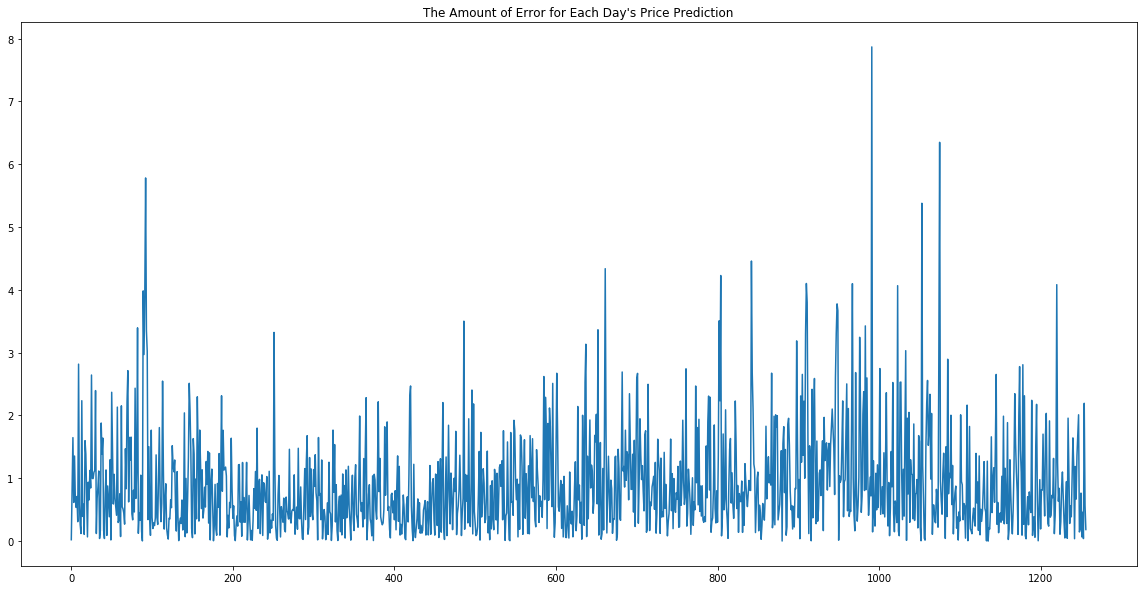

Max 7.866834223021769
Min 0.00024951771402470513
Avg 0.905318257956645


In [37]:
sumOdatas
plt.figure(figsize=(20,10))
plt.title("The Amount of Error for Each Day's Price Prediction")
plt.plot(sumOdatas)
plt.show()
maxData = 0
minData = 10
average = 0
count = 0
for data in sumOdatas:
    if(maxData < data.item()):maxData = data.item()
    if(minData > data.item()):minData = data.item()
    average = average + data.item()
    count = count + 1
print("Max " + str(maxData))
print("Min " + str(minData))
print("Avg " + str(average/count))

In [25]:
import io
from IPython.nbformat import current
import glob
nbfile = glob.glob('Project Report Example.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

C:\Users\Sam\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\Sam\Anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


IndexError: list index out of range